# Analyzing NYC TLC's "For Hire Vehicles" dataset

August 14, 2018

This notebook contains a humble analysis of "For Hire Vehicles (FHV) - Active" open dataset issued by the New York City Taxi & Limousine Commission. It is concentrated on transportation network companies (Uber, Lyft, Via and Juno), not on all FHV bases licenced by the Commission.

You may familiarize with the dataset here: https://data.cityofnewyork.us/Transportation/For-Hire-Vehicles-FHV-Active/8wbx-tsch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

Let's use the Socrata Open Data API to import the dataset. Drop columns that will not be necessary.

In [2]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("k5sk-y8y9", limit=1000000)
df = pd.DataFrame.from_records(results)
df = df.drop(["vehicle_license_number", "name", "license_type", 
         "permit_license_number", "dmv_license_plate_number", 
         "hack_up_date", "base_telephone_number", "website", 
         "base_address"], axis=1);

Multiple bases doing business under TNC brands in New York. Let's "reveal" them. DBA names can be found at TLC's website: http://www.nyc.gov/html/tlc/html/industry/current_licensees.shtml

In [3]:
df = df.replace(["KUCHEN LLC", "WEITER LLC", "DANACH-NY,LLC", "ZWANZIG-NY,LLC", 
                  "UNTER LLC", "SECHZEHN-NY, LLC", "DRINNEN-NY LLC", "ELF-NY,LLC", 
                  "VIERZEHN-NY, LLC", "DREIZEHN-NY, LLC", "ACHTZEHN-NY, LLC", 
                  "FUNF-NY, LLC", "DREIST NY LLC", "NEUN-NY,LLC", "FUNFZEHN-NY, LLC", 
                  "SECHS-NY, LLC", "ACHT-NY,LLC", "VIER-NY,LLC", "GRUN LLC", 
                  "ZWEI-NY,LLC", "HINTER LLC", "ZEHN-NY,LLC.", "ZWOLF-NY, LLC", 
                  "EINS-NY,LLC", "SCHMECKEN LLC", "EINUNDZWANZIG-NY, LLC", 
                  "ABATAR LLC", "SIEBEN-NY,LLC", "SIEBZEHN-NY,LLC", "NEUNZEHN-NY, LLC"], "UBER")

df = df.replace(["TRI-CITY,LLC", "ENDOR CAR & DRIVER,LLC."], "LYFT")

df = df.replace(["FLATIRON TRANSIT LLC", "GREENPOINT TRANSIT LLC"], "VIA")

df = df.replace(["SABO ONE LLC", "SABO TWO LLC", "VULCAN CARS LLC", "OMAHA LLC"], "JUNO")

In [4]:
TNC = ["UBER", "LYFT", "VIA", "JUNO"]
df = df[df['base_name'].isin(TNC)]
df.vehicle_year = pd.to_numeric(df.vehicle_year, errors='coerce')

The first three characters of the VIN number is the World Manufacturer Identifier (car's brand). Let's create a column with WMI numbers.

In [5]:
df['WMI'] = df['vehicle_vin_number'].str[:3]

Text(0.5,0,'Frequency')

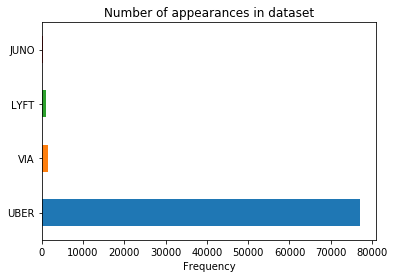

In [6]:
df.base_name.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

In [7]:
df.base_name.value_counts()

UBER    77182
VIA      1620
LYFT     1138
JUNO      330
Name: base_name, dtype: int64

As we may see Uber a way more vehicles in New York than other TNCs. Not surprising. A more interesting thing is that Via has 500 more vehicles than Lyft.

In [8]:
df.describe()

,vehicle_year
count,80270.000000
mean,2015.463710
std,37.351299
min,1014.000000
25%,2014.000000
50%,2015.000000
75%,2017.000000
max,7143.000000


The mean age of a TNC car in New York is 3 years.

In [9]:
%run WMId.py
# WMId.py file contains a dictionary with WMIs and car brands

In [10]:
brand = []

for n in df['WMI']:
    if n in WMId:
        brand.append(WMId[n])
    else:
        brand.append('Unknown')
        
df['brand'] = brand

Toyota           37895
Honda            11757
Nissan            7118
Chevrolet         4081
Hyundai           3689
Ford              2073
Lincoln           1621
Acura             1087
Lexus             1068
Chrysler           971
Cadillac           883
GMC                839
Mercedes-Benz      820
Unknown            567
Volkswagen         442
Jeep               350
BMW                339
Mitsubishi         265
Mazda              260
Kia                237
Buick              167
Audi               166
Subaru             154
Hyundai, Kia        98
Pontiac             90
Dodge               62
Volvo               27
Infiniti            11
Land Rover          11
Mercury             11
Jaguar               7
Suzuki               5
Porsche              5
Scion                4
Saturn               1
Maserati             1
Name: brand, dtype: int64


Text(0.5,0,'Frequency')

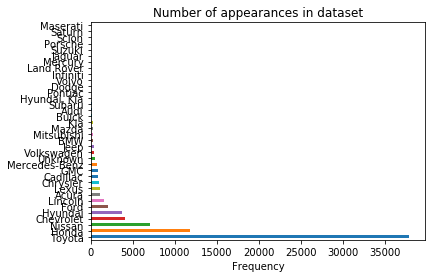

In [11]:
df_uber = pd.DataFrame()

df_uber = df_uber.append(df[df['base_name'] == "UBER"])

print df_uber.brand.value_counts()

df_uber.brand.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

As you may see Toyota is the most popular car used in Uber. Almost 38 thousands in New York!

In [12]:
df_uber.vehicle_year.describe()

count    77182.000000
mean      2015.421212
std         36.347551
min       2001.000000
25%       2014.000000
50%       2015.000000
75%       2017.000000
max       7143.000000
Name: vehicle_year, dtype: float64

Toyota           651
Honda            171
Hyundai           72
Nissan            71
Chevrolet         29
Lincoln           23
Ford              22
Chrysler          18
Acura             12
Lexus             12
Jeep               9
GMC                9
Mitsubishi         5
Mercedes-Benz      5
Cadillac           5
Volkswagen         4
Subaru             4
Audi               3
Mazda              3
Kia                3
BMW                2
Hyundai, Kia       2
Dodge              1
Unknown            1
Porsche            1
Name: brand, dtype: int64


Text(0.5,0,'Frequency')

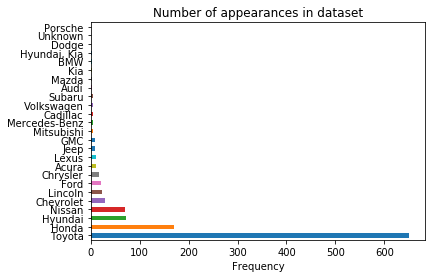

In [13]:
df_lyft = pd.DataFrame()

df_lyft = df_lyft.append(df[df['base_name'] == "LYFT"])

print df_lyft.brand.value_counts()

df_lyft.brand.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

In [14]:
df_lyft.describe()

,vehicle_year
count,1138.000000
mean,2017.831283
std,88.974217
min,2001.000000
25%,2015.000000
50%,2016.000000
75%,2016.000000
max,5016.000000


The mean age of a Lyft car in New York is 1 year. Quite impressive!

Mercedes-Benz    936
Toyota           267
Chevrolet        172
Honda             65
Nissan            36
Ford              31
Chrysler          23
Lincoln           17
Cadillac          15
Hyundai           14
GMC               13
Acura              7
Lexus              6
Unknown            6
Jeep               3
Mazda              2
Hyundai, Kia       2
BMW                2
Mitsubishi         2
Volkswagen         1
Name: brand, dtype: int64


Text(0.5,0,'Frequency')

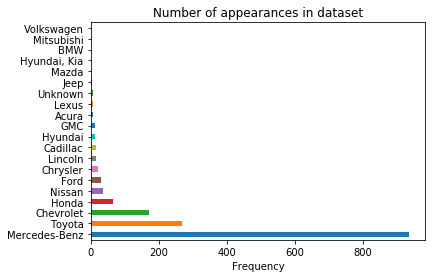

In [15]:
df_via = pd.DataFrame()

df_via = df_via.append(df[df['base_name'] == "VIA"])

print df_via.brand.value_counts()

df_via.brand.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

Unlike other TNCs, Via prefer Mercedes. Probably because they have a joint venture: https://www.daimler.com/products/services/mobility-services/via.html

In [16]:
df_via.describe()

,vehicle_year
count,1620.000000
mean,2015.901852
std,24.963858
min,1014.000000
25%,2016.000000
50%,2017.000000
75%,2018.000000
max,2018.000000


Toyota           164
Honda             55
Nissan            27
Chevrolet         24
Hyundai           10
Lexus              8
Cadillac           7
Lincoln            6
Ford               6
Mercedes-Benz      5
Acura              4
Chrysler           3
GMC                3
Jeep               2
Mitsubishi         1
Unknown            1
BMW                1
Buick              1
Volkswagen         1
Audi               1
Name: brand, dtype: int64


Text(0.5,0,'Frequency')

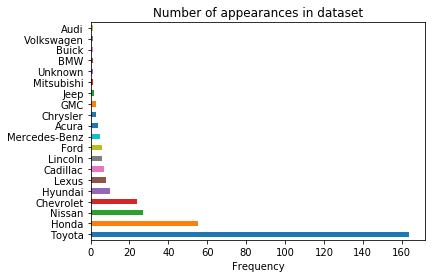

In [17]:
df_juno = pd.DataFrame()

df_juno = df_juno.append(df[df['base_name'] == "JUNO"])

print df_juno.brand.value_counts()

df_juno.brand.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

In [18]:
df_juno.vehicle_year.describe()

count     330.000000
mean     2015.087879
std         1.569515
min      2008.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2018.000000
Name: vehicle_year, dtype: float64

WAV    154
HYB    119
CUR      1
Name: veh, dtype: int64


Text(0.5,0,'Frequency')

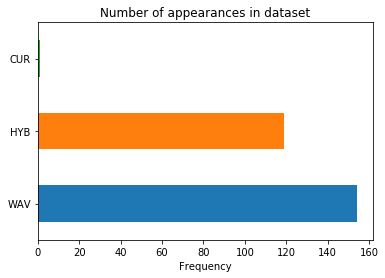

In [19]:
print df.veh.value_counts()

df.veh.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

In [20]:
df.wheelchair_accessible.value_counts()

WAV    154
Name: wheelchair_accessible, dtype: int64

Sad thing is that there are only wheelchair accessible154 cars used by TNCs in such a big city as New York.